                                             Workshop 4: Dragos Gruia and Valentina Giunchiglia

# Introduction to modelling neuronal dynamics in networks with excitation and inhibition

The aim of the today's lecture was to introduce you to modelling neuronal responses across multiple scales. We saw that the dynamics of brain and its functional and dysfunctional activity can be modelled across different levels, from single neurons to networks of neurons. 

In this tutorial, we focus on one class of models introduced in the lecture, namely Wilson-Cowan network models. The Wilson-Cowan model describes the general dynamics of interacting excitatory and inhibitory neuronal populations. We use this model to gain insight into the evolution of neural activity during transient dynamics, as well as in the stationary state (in equilibrium):

- **Transient dynamics**: the dynamics of responses to external perturbations or intrinsic fluctuations;
- **Stationary State**: the activity of neuron and networks when settled into a rather stable state.

In the workshop today, we will start to teach you how to model and understand these aspects of neural dynamics, and how to analyse large-scale networks composed of excitatory and inhibitory units.


Before starting to implement the model, we need to import the modules that you will need in the workshop.

In [2]:
import numpy as np 
from scipy import fftpack

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sb
sb.set_theme("talk")
sb.set_style("whitegrid")

We then start by implementing the two equations described in the lecture by Wilson-Cowan model.

There are two equations each describing the dynamics of one population.

The first one, describing the dynamics of the excitatory (E) population:

- $\tau_E \, dr_E/dt = -r_E + g(w_{EE} \, r_E - w_{EI} \, r_I + I_E)$

And the second one, describing the dynamics of the inhibitory (I) population:

- $\tau_I \, dr_I/dt = -r_I + g(w_{IE} \, r_E - w_{II} \, r_I + I_I)$

Familiarize yourself with different terms, as we need to play with them in the following:

- $r_E$ and $r_I$: activity of excitatory (E) and inhibitory (I) populations
- $dr$: changes in the activity at each time step
- $w$: weights of recurrent connections between the two population (with 4 possibilities)
- $w_{EI}$ is the connection from $I$ to $E$
- $w_{IE}$ is the connection from $E$ to $I$
- $\tau$: time constant of integration (effectively, how fast or slow each population respond to the input)
- $g$: activation function (which describes how the input is transferred to output)

For the activation function, we choose a linear-rectified function.
This activation function rectifies (=0) any negative input ($g(x)=0$ if $x<0$), and returns the same value for any positive value (hence linear: $g(x)=x$ if $x>0$).
The following function implements such an activation function.  

In [5]:
# - activation function (linear-rectified)
def act_fun(z): 
    return z *(z>0)

## A solver for Wilson-Cowan equations

Now we need to solve the main equations. 

These are two "differential equations", meaning that they are equations that describe changes in some parameters as a function of their current values: $dx = f(x)$. To solve such equations, we need to update them in "steps": the value of $x$ in the next step ($x(n+1)$) is obtained from its previous value plus the "differential": $x(n+1) = x(n) + dx = x(n) + f(x)$. 

Since we are interested in temporal dynamics, these steps are "time steps". We use Python to write a for loop which runs over time (in time steps, $dt$, that we define). At each time step, we calculate the differential ($dx$ - or $dr$, from Wilson-Cowan equations), and update the parameters of interest (in this case, the activity of excitation and inhibition, $r_E$ and $r_I$). In the next step, the differentials are calculated from the updated parameters, and so on and so forth. This is called the Euler method to solve a differential equation (there are more complicated methods too, for more complex equations, but this would work for us for now).  

The function below is a solver that uses this method to solve Wilson-Cowan equations.

In [6]:
# - solver function (for Wilson-Cowan equations)
def WC_solver(I_E, I_I, w_EE, w_EI, w_IE, w_II, tau_E, tau_I, dt, T_end):

    T = np.arange(0, T_end, dt);

    r_E = np.zeros(len(T));
    r_I = np.zeros(len(T));

    #I_E = .5+pl.rand(len(T));
    #I_I = 1+pl.rand(len(T));

    for i in range(len(T)-1):  
        dr_E = dt/tau_E * (-r_E[i] + act_fun(w_EE * r_E[i] + w_EI *r_I[i] + I_E));
        dr_I = dt/tau_I * (-r_I[i] + act_fun(w_IE * r_E[i] + w_II *r_I[i] + I_I));

        r_E[i+1] = r_E[i] + dr_E
        r_I[i+1] = r_I[i] + dr_I

    return r_E, r_I, T

As you can see, the function receives multiple inputs.
- First, inputs (constant values) to excitation and inhibition: I_E and I_I.
- Second, the weights of connection between excitatory and inhibitory neurons: w_EE, w_EI, w_IE, w_II.
- Third, the time constants of integration for different populations: tau_E, tau_I.
- Finally, two parameters describing the time steps of integration: dt which determines the time step (or time resolution of integration); and T_end, which specifies for how long the equations are solved.   

In return, the function gives us two arrays (r_E and r_I) corresponding to the activity of excitatory and inhibitory populations, and the array of time points (T) for which the equations were solved (all with the total length of T_end/dt).

In the following, we use the function to solve the equations for these parameters:
- I_E = 1; I_I = 1
- w_EE = 0.5; w_IE = 0.5; w_EI = -0.5; w_II = -0.5
- tau_E = 10; tau_I = 10
- dt = 0.1; T_end = 1000

[Note that dt should be always chosen to be an order of magnitude smaller than characteristic time scale of dynamics, namely tau_E and tau_I here.]


This is because you want to see fine resolution changes in the gradient (the smaller the $dt$ as compared to $\tau$ the finer the resolution)

In [7]:
dt = 0.1;
T_end = 200;

tau_E = 10;
tau_I = 10;

w_EE = 0.5;
w_IE = 0.5; 
w_EI = -0.5; 
w_II = -0.5;

I_E = 1;# a constant input to both populations   
I_I = 1;#i guess we would expect them to cancel out with all other parameters being equal

[r_E, r_I, T] = WC_solver(I_E, I_I, w_EE, w_EI, w_IE, w_II, tau_E, tau_I, dt, T_end);

print(T)
print(r_E)
print(r_I)

[0.000e+00 1.000e-01 2.000e-01 ... 1.997e+02 1.998e+02 1.999e+02]
[0.     0.01   0.0199 ... 1.     1.     1.    ]
[0.     0.01   0.0199 ... 1.     1.     1.    ]


We can visualize the activity of the two populations by plotting them against time.
What you see is the convergence of activity of two populations to "steady state" values .. (transient and s.s.)

Text(0.5, 1.0, 'As expected the two rates are identical when all parameters are identical')

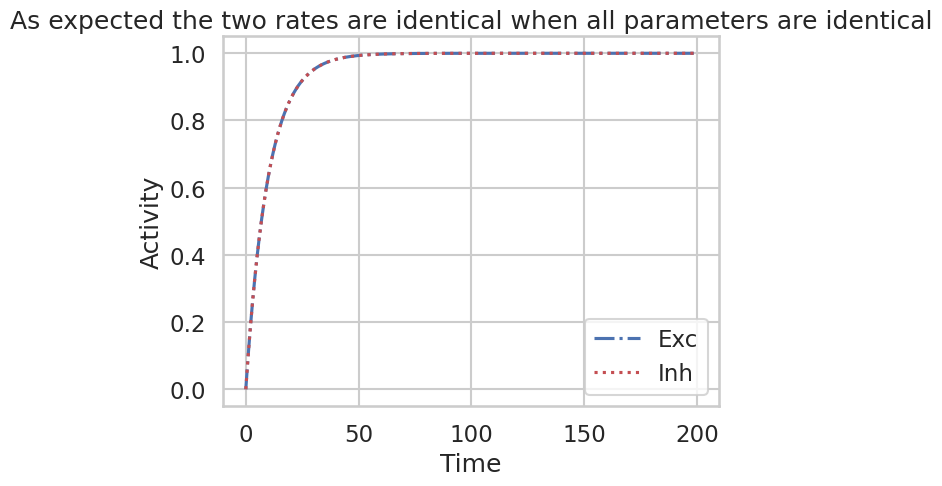

In [17]:
plt.figure()
plt.plot(T, r_I, 'b-.')
plt.plot(T, r_E, 'r:')

plt.legend(['Exc', 'Inh'])
plt.xlabel('Time')
plt.ylabel('Activity')
plt.title("As expected the two rates are identical when all parameters are identical")


## Effect of feedforward input on neuronal dynamics

You can now experiment with different values of the function / equations and observe their effects on neuronal activity. 

First start by changing the inputs.

Change the input to excitatory and inhibitory neurons, and compare the responses to the following inputs:

- (I_E, I_I) = (1, 1)
- (I_E, I_I) = (0.5, 1) 
- (I_E, I_I) = (1, 0.5)
- (I_E, I_I) = (2, 2)

How do the dynamics of the activity change in each case?
Describe this during transient responses, and when the activity reaches its "steady state" (given the time constants of integration, the current simulation time is long enough such that the activity at the end of simulation can be assumed to be in the steady state).

Can you predict the steady state value of activity from the equations?

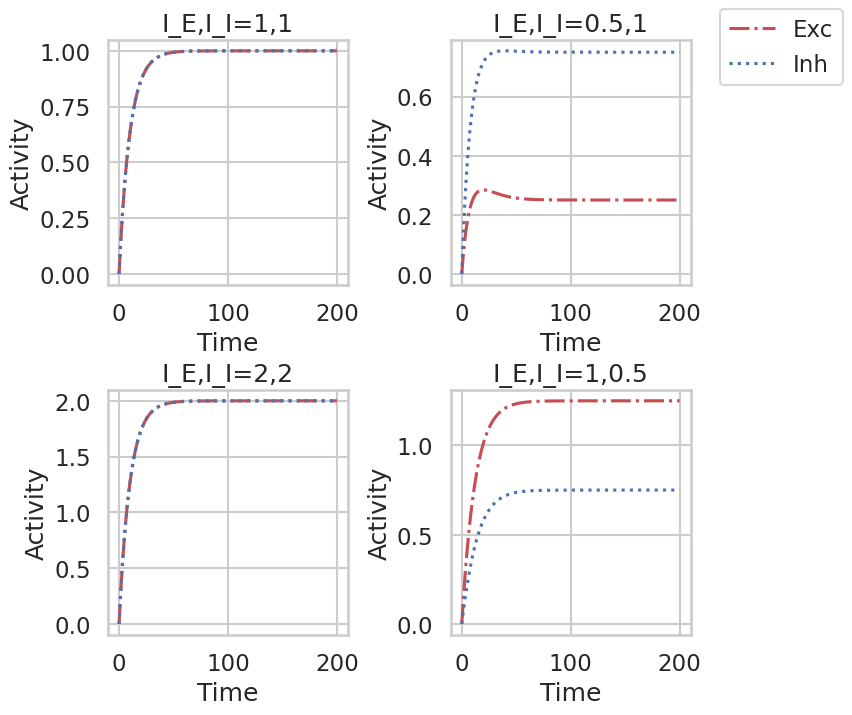

In [55]:
# CODE HERE
#0.5,1
I_E = 1; 
I_I = 1;

[r_E_0, r_I_0, T] = WC_solver(I_E, I_I, w_EE, w_EI, w_IE, w_II, tau_E, tau_I, dt, T_end);

#0.5,1
I_E = 0.5; 
I_I = 1;

[r_E_1, r_I_1, T] = WC_solver(I_E, I_I, w_EE, w_EI, w_IE, w_II, tau_E, tau_I, dt, T_end);
#1,0.5
I_E = 1; 
I_I = 0.5;

[r_E_2, r_I_2, T] = WC_solver(I_E, I_I, w_EE, w_EI, w_IE, w_II, tau_E, tau_I, dt, T_end);
#2,2
I_E = 2; 
I_I = 2;

[r_E_3, r_I_3, T] = WC_solver(I_E, I_I, w_EE, w_EI, w_IE, w_II, tau_E, tau_I, dt, T_end);

fig,axs= plt.subplots(2,2,constrained_layout=True,figsize=(7,7))
#
axs[0,0].plot(T, r_E_0, 'r-.')
axs[0,0].plot(T, r_I_0, 'b:')
axs[0,0].set_xlabel('Time')
axs[0,0].set_ylabel('Activity')
axs[0,0].set_title('I_E,I_I=1,1')
#Equivalent
#
axs[0,1].plot(T, r_E_1, 'r-.')
axs[0,1].plot(T, r_I_1, 'b:')
axs[0,1].set_xlabel('Time')
axs[0,1].set_ylabel('Activity')
axs[0,1].set_title('I_E,I_I=0.5,1')
#'Transient increase in both
#Exc reaches a maximum shortly before In
#and then both reach steady state slightly below the maximum'
#
axs[1,1].plot(T, r_E_2, 'r-.')
axs[1,1].plot(T, r_I_2, 'b:')
axs[1,1].set_xlabel('Time')
axs[1,1].set_ylabel('Activity')
axs[1,1].set_title('I_E,I_I=1,0.5')
#transient increase in both, monotonic increase until maximum value which is the steady state value
#
axs[1,0].plot(T, r_E_3, 'r-.')
axs[1,0].plot(T, r_I_3, 'b:')
axs[1,0].set_xlabel('Time')
axs[1,0].set_ylabel('Activity')
axs[1,0].set_title('I_E,I_I=2,2')
#equivalent
fig.legend(['Exc', 'Inh'],bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)


We can plot the steady state responses of E and I to varying inputs. 

Use the following code to change the input to excitation and measure the response of excitatory and inhibitory populations.

Note that the steady state value of the response is taken as the last value in each simulation.

When do the two lines cross? Can you explain what it means?

Text(0, 0.5, 'Activity (steady state)')

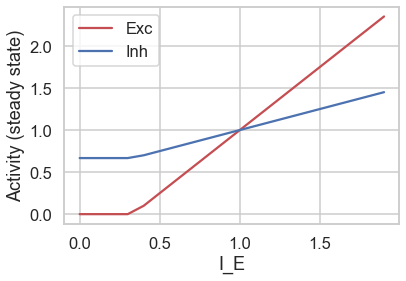

In [ ]:
I_E_range = np.arange(0, 2, .1); 
I_I = 1;

r_E_range = np.zeros(I_E_range.shape);
r_I_range = np.zeros(I_E_range.shape);
for i, I_E in enumerate(I_E_range):
    [r_E, r_I, T] = WC_solver(I_E, I_I, w_EE, w_EI, w_IE, w_II, tau_E, tau_I, dt, T_end);
    r_E_range[i] = r_E[-1];
    r_I_range[i] = r_I[-1];

plt.figure()
plt.plot(I_E_range, r_E_range, 'r-')
plt.plot(I_E_range, r_I_range, 'b-')
plt.legend(['Exc', 'Inh'])
plt.xlabel('I_E')
plt.ylabel('Activity (steady state)')

Change the above code to plot the steady state responses to varying input to inhibition.

Do you see the same dependence? Describe and explain your observation.

Text(0, 0.5, 'Activity (steady state)')

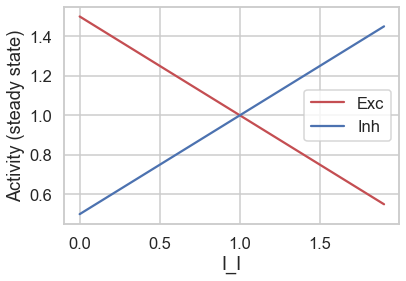

In [ ]:
# CODE HERE
I_I_range = np.arange(0, 2, .1); 
I_E = 1;

r_E_range = np.zeros(I_E_range.shape);
r_I_range = np.zeros(I_E_range.shape);
for i, I_I in enumerate(I_E_range):
    [r_E, r_I, T] = WC_solver(I_E, I_I, w_EE, w_EI, w_IE, w_II, tau_E, tau_I, dt, T_end);
    r_E_range[i] = r_E[-1];
    r_I_range[i] = r_I[-1];

plt.figure()
plt.plot(I_I_range, r_E_range, 'r-')
plt.plot(I_I_range, r_I_range, 'b-')
plt.legend(['Exc', 'Inh'])
plt.xlabel('I_I')
plt.ylabel('Activity (steady state)')

## Effect of recurrent coupling on neuronal dynamics

Now let's experiment with the recurrent couplings.

In the following code, we set the inputs to initial values (I_E = I_I = 1), and simulate the activity of excitatory and inhibitory units for different values of recurrent connectivity.

We first investigate the effect of excitatory-to-excitatory connectivity (w_EE). To do that, we turn off all other recurrent connections, namely w_EI = w_IE = w_II = 0, and change the value of w_EE.

The code below is written for w_EE = 0.5. Change the value of w_EE to smaller and larger values and compare the results.

Text(0, 0.5, 'Activity')

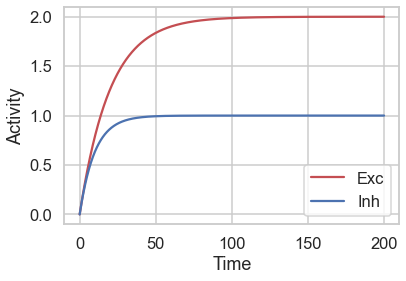

In [ ]:
I_E = 1; 
I_I = 1;

w_EI = w_IE = w_II = 0;

w_EE = 0.5;

[r_E, r_I, T] = WC_solver(I_E, I_I, w_EE, w_EI, w_IE, w_II, tau_E, tau_I, dt, T_end);

plt.figure()
plt.plot(T, r_E, 'r-')
plt.plot(T, r_I, 'b-')
plt.legend(['Exc', 'Inh'])
plt.xlabel('Time')
plt.ylabel('Activity')

What happens when w_EE reaches 1 - or exceeds 1?
Can you explain why this happens?

Text(0, 0.5, 'Activity')

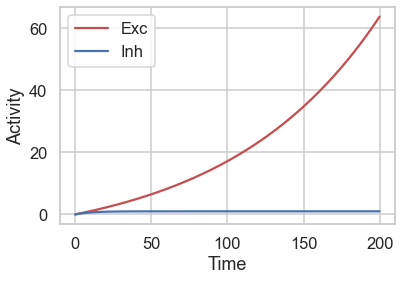

In [ ]:
# CODE HERE

I_E = 1; 
I_I = 1;

w_EI = w_IE = w_II = 0;

w_EE = 1.1;

[r_E, r_I, T] = WC_solver(I_E, I_I, w_EE, w_EI, w_IE, w_II, tau_E, tau_I, dt, T_end);

plt.figure()
plt.plot(T, r_E, 'r-')
plt.plot(T, r_I, 'b-')
plt.legend(['Exc', 'Inh'])
plt.xlabel('Time')
plt.ylabel('Activity')

Excitatory connectivity in cortical networks can amplify the feedforward signal, and help with processing like motor movement, learning and memory, by generating persistent activity. 
In moderate values, w_EE can lead to amplification of the input, as you saw in previous examples.
But too much recurrent excitation can lead to pathological states of hyperactivity and hypersynchrony, for example as in epilepsy.

In the Wilson-Cowan model above, when w_EE > 1, the dynamics of excitatory population alone becomes unstable.
This is due to an unstable "positive feedback".
To balance this strong positive feedback, we need strong negative feedback.
This can be achieved by turning on recurrent excitatory-inhibitory connections.
Increase w_IE, w_EI and w_II to the same level as w_EE and see if this can bring the network back to balance.

Text(0, 0.5, 'Activity')

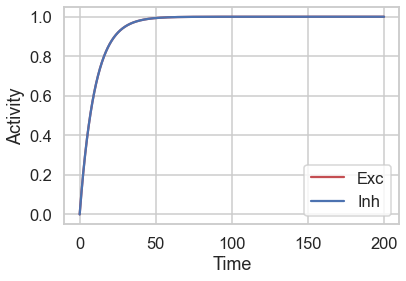

In [ ]:
# CODE HERE

I_E = 1; 
I_I = 1;

w_EE = 1.5;
w_IE = 1.5;
w_EI = w_II = -1.5;

[r_E, r_I, T] = WC_solver(I_E, I_I, w_EE, w_EI, w_IE, w_II, tau_E, tau_I, dt, T_end);

plt.figure()
plt.plot(T, r_E, 'r-')
plt.plot(T, r_I, 'b-')
plt.legend(['Exc', 'Inh'])
plt.xlabel('Time')
plt.ylabel('Activity')

## Effect of time constants of integration on neuronal dynamics

As we saw in the previous exercise, strong negative feedback can balance strong positive feedback.

But for this to work properly, the inhibitory feedback should be fast.

So far, we chose similar time constants of integration for excitatory and inhibitory populations: tau_E = tau_I.

Let's now explore the effect of changing time constants on neural dynamics.

Keep tau_E = 10 as before and increase tau_I to 20, 30, 40, ...

What do you observe?

[Increase the time of simulation (T_end = 1000) to be able to make longer observations.]

Text(0, 0.5, 'Activity')

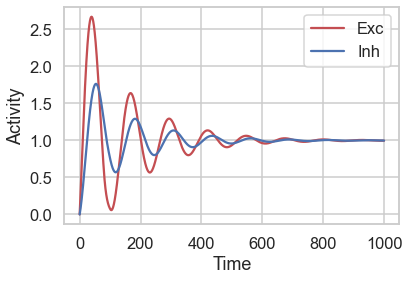

In [ ]:
# CODE HERE

T_end = 1000;

tau_E = 10;

tau_I = 40;

[r_E, r_I, T] = WC_solver(I_E, I_I, w_EE, w_EI, w_IE, w_II, tau_E, tau_I, dt, T_end);

plt.figure()
plt.plot(T, r_E, 'r-')
plt.plot(T, r_I, 'b-')
plt.legend(['Exc', 'Inh'])
plt.xlabel('Time')
plt.ylabel('Activity')

For the combination (tau_E, tau_I) = (10, 40), repeat the experiment with different recurrent couplings.

Let w_EE = w_IE = J, and w_IE = w_II = -J. This means that the strength of all recurrent connections is the same (up to different signs for excitatory and inhibitory connections). We have therefore a single parameter, J, which controls the strength of recurrent coupling.

Now change J from 0.5 to 2, and repeat the experiment.

Text(0, 0.5, 'Activity')

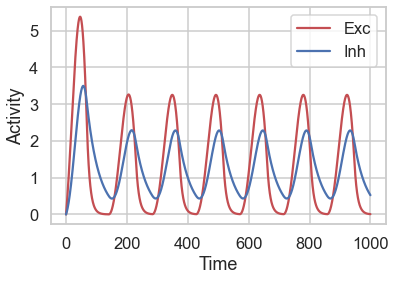

In [ ]:
tau_E = 10;
tau_I = 40;

J = 2;

w_EE = w_IE = J;
w_EI = w_II = -J;

[r_E, r_I, T] = WC_solver(I_E, I_I, w_EE, w_EI, w_IE, w_II, tau_E, tau_I, dt, T_end);

plt.figure()
plt.plot(T, r_E, 'r-')
plt.plot(T, r_I, 'b-')
plt.legend(['Exc', 'Inh'])
plt.xlabel('Time')
plt.ylabel('Activity')

In networks with strong recurrent coupling, oscillations emerge when the inhibitory feedback is delayed.
In a way, these oscillations can be seen as a sort of instability too - a transient instability, until inhibition is strong enough to control the build up of excitation (push-pull effect).

In contrast, the networks we modelled before with comparable time constants of excitation and inhibition reached a stationary state - even if they had initial transients.
Technically, the activity of excitatory and inhibitory neurons in oscillatory networks never reach to a "steady state" - as they are always transitioning between up and down states. 

You can visualize these different dynamics by plotting excitatory and inhibitory activity against each other.

Use these visualizations for different combinations of parameters and describe your observations.
when the network activity reaches a steady state, you have a fixed point where both r_E and r_I converge to.
When the network is oscillating, this plot does not converge into a single fixed point; instead, the activity converges into a cycle where r_E and r_I values periodically change over it endlessly (limit cycle).

Text(0, 0.5, 'r_I')

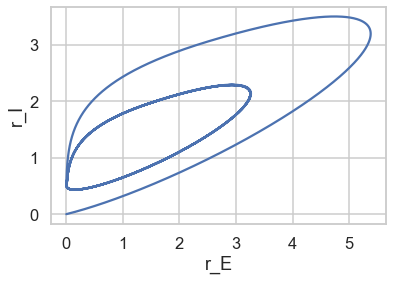

In [ ]:
tau_E = 10;
tau_I = 40;

J = 2;

w_EE = w_IE = J;
w_EI = w_II = -J;

[r_E, r_I, T] = WC_solver(I_E, I_I, w_EE, w_EI, w_IE, w_II, tau_E, tau_I, dt, T_end);

plt.figure()
plt.plot(r_E, r_I)
plt.xlabel('r_E')
plt.ylabel('r_I')

As quantification of brain dynamics shows oscillations emerging at different frequency bands, it is interesting to ask whether the brain is ever "stationary".
As we saw before, one way to generate these oscillations is from the interaction of excitation and inhibition in brain networks. In this case, the strength and the frequency of oscillations would be determined by the strength of recurrent and feedback connections, and the timescale of their responses and communication delays. One source of this delay can, for instance, be the synaptic delays, but we have not modelled them here (there are other potential mechanisms for oscillations, like gap junctions or short-term plasticity, which can be modelled in more advanced models).

Within the framework of Wilson-Cowan model, can you tell how we can change the parameters to control the frequency of oscillations?
How would you change the time constants to get slower or faster oscillations?

Text(0, 0.5, 'Activity')

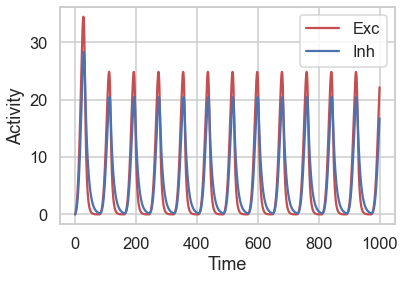

In [ ]:
tau_E = 5;
tau_I = 10;

J = 5;

w_EE = w_IE = J;
w_EI = w_II = -J;

[r_E, r_I, T] = WC_solver(I_E, I_I, w_EE, w_EI, w_IE, w_II, tau_E, tau_I, dt, T_end);

plt.figure()
plt.plot(T, r_E, 'r-')
plt.plot(T, r_I, 'b-')
plt.legend(['Exc', 'Inh'])
plt.xlabel('Time')
plt.ylabel('Activity')

We can quantify these oscillations in our model networks by using Fourier transform.
It calculates the strength of oscillations at each frequency.

Use the function which is provided below to find the main oscillation frequency of the previous network.

12.000000000000002


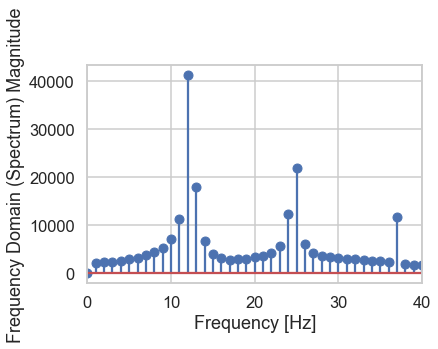

In [ ]:
def FF(x0, plotting):
    f_s = 1000/dt

    x = x0 - np.nanmean(x0)

    X = fftpack.fft(x)
    freqs = fftpack.fftfreq(len(x)) * f_s

    max_freq = freqs[np.argmax(abs(X))]
    max_mag = abs(X[np.argmax(abs(X))])

    if plotting: 
        plt.figure()
        plt.stem(freqs, np.abs(X))
        plt.xlabel('Frequency [Hz]')
        plt.ylabel('Frequency Domain (Spectrum) Magnitude')
        plt.xlim([0,40])
    return freqs, X, max_freq, max_mag

[freqs, X, max_freq, max_mag] = FF(r_E, 1)

print(max_freq)

Change the parameters of network (time constants and recurrent coupling) and see how the main frequency changes.

14.0


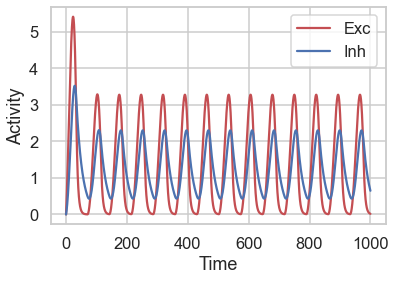

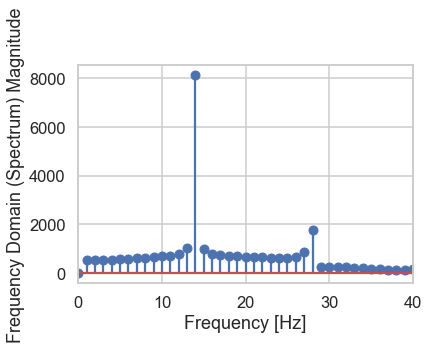

In [ ]:
## CODE HERE

tau_E = 5;
tau_I = 20;

J = 2;

w_EE = w_IE = J;
w_EI = w_II = -J;

[r_E, r_I, T] = WC_solver(I_E, I_I, w_EE, w_EI, w_IE, w_II, tau_E, tau_I, dt, T_end);

plt.figure()
plt.plot(T, r_E, 'r-')
plt.plot(T, r_I, 'b-')
plt.legend(['Exc', 'Inh'])
plt.xlabel('Time')
plt.ylabel('Activity')

[freqs, X, max_freq, max_mag] = FF(r_E, 1)

print(max_freq)

## Simulating large-scale excitatory-inhibitory networks

So far, we gained some computational insights into the interaction of excitation and inhibition in a reduced model composed of two populations.
Although useful for understanding and analysis, reduced models are unlikely to tell us everything about the complex dynamics of large-scale networks in the brain.
We therefore need to expand our models to simulate multiple networks of neurons.

The previous implementation is, however, difficult to scale with the number of populations.
(As an exercise, try to expand the function *WC_solver* to 10 populations.
You need to write a function with 122 inputs (10 inputs, 10 time constants, 100 weights, in addition to dt and T_end), which returns 11 outputs. You admit it is not the most fun thing to do.)
This is not only inconvenient in terms of programming, but it is also costly in terms of computational load.
(For 10 populations, you need to solve 10 separate equations in each step of the for loop, meaning that the total run time would be slower by ~10 times -- imagine what happens when you simulate a network with N = 1000.)

Luckily, a better and smarter way is available to solve the N-dimensional differential equations.
We can use matrix-wise and vectorized operations to implement and solve these equations more easily and more efficiently.

Below is one such implementation. Can you work out how it works, and relate it to different components we had before?

In [ ]:
# - solver function (for Wilson-Cowan equations - matrix-wise implementation)
def WC_solver_MW(I, W, tau, dt, T_end):

    N = len(W);

    T = np.arange(0, T_end, dt);

    # vector of all rates
    r = np.zeros((N,len(T)))

    # vector of all inputs
    #I = 1+pl.rand(2,len(T))

    for i in range(len(T)-1):  
        I_rec = np.array(np.matrix(W) * np.matrix(r[:,i]).T).T[0]
        dr = dt/tau * (-r[:,i] + act_fun(I_rec + I))

        r[:,i+1] = r[:,i] + dr

    return r, T

In the following code, we used the matrix-wise implementation to simulate the same networks as before, with 2 populations.
Note that the weight matrix should be provided as a 2 x 2 array (N x N in general; this will be converted to a matrix within the function to perform matrix-wise multiplication), and other parameters like the time constants and inputs are provided as 1 x N arrays (which is a format for vectorized operation in Python).

Using vectorized representations and matrix-wise operations, all the N-dimensional equations can be solve in one line (at each step of the for loop); observe and identify this in the function above.

Text(0, 0.5, 'Activity')

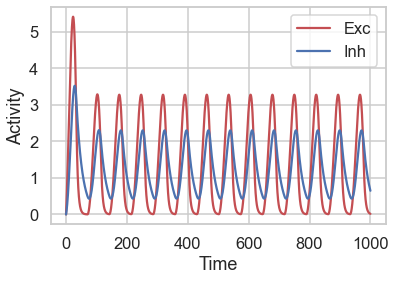

In [ ]:
W = np.array([[w_EE, w_EI],
                [w_IE, w_II]]);

tau = np.array([tau_E, tau_I])

I = [1,1];

[r, T] = WC_solver_MW(I, W, tau, dt, T_end);

plt.figure()
plt.plot(T, r[0,:], 'r-')
plt.plot(T, r[1,:], 'b-')
plt.legend(['Exc', 'Inh'])
plt.xlabel('Time')
plt.ylabel('Activity')

Experiment with the code above and repeat some of experiments you performed before with the previous implementation.
Do you get the same results?

In [ ]:
## CODE HERE

The real efficiency of the new implementation is demonstrated for larger number of populations / equations.
In the following, we use the function to simulate the dynamics of activity of N interacting populations.
Instead of specifying the connection weights between all pairs of pre- and post-synaptic populations, we draw the weights from a distribution - in this case a Gaussian distribution with a certain mean and standard deviation.

Text(0, 0.5, 'Activity')

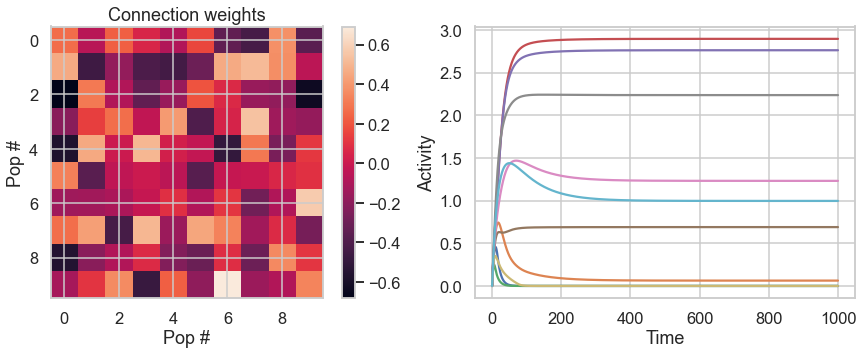

In [ ]:
N = 10;

W = np.random.normal(0, 1, [N,N]) / np.sqrt(N)

tau = 10*np.ones(N);

I = np.ones(N);

[r, T] = WC_solver_MW(I, W, tau, dt, T_end);

plt.figure(figsize=(15,5))

plt.subplot(121)
plt.imshow(W)
plt.colorbar()
plt.title('Connection weights')
plt.xlabel('Pop #')
plt.ylabel('Pop #')

plt.subplot(122)
plt.plot(T, r.T, '-')
plt.xlabel('Time')
plt.ylabel('Activity')

Use the code above to simulate the dynamics of large-scale networks for different weight distributions.
You can start by changing the mean and std of the Gaussian distribution and describe what you observe.
You can also try other distributions, like log normal distribution, which seems to be better describing the long-tailed distribution of weights in the brain.

Text(0, 0.5, 'Activity')

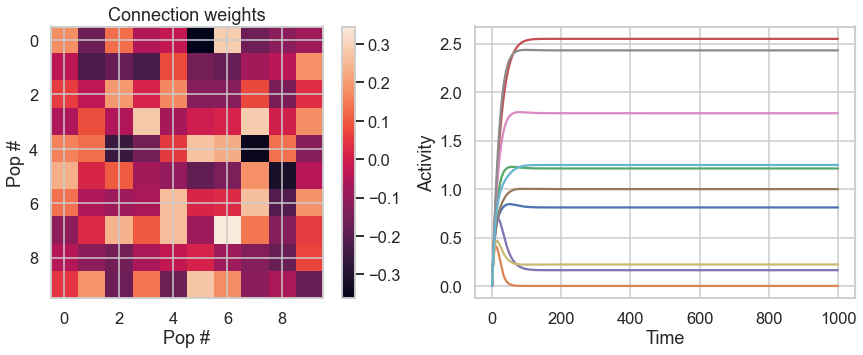

In [ ]:
## CODE HERE

N = 10;

W = np.random.normal(0, 1/2, [N,N]) / np.sqrt(N)

tau = 10*np.ones(N);

I = np.ones(N);

[r, T] = WC_solver_MW(I, W, tau, dt, T_end);

plt.figure(figsize=(15,5))

plt.subplot(121)
plt.imshow(W)
plt.colorbar()
plt.title('Connection weights')
plt.xlabel('Pop #')
plt.ylabel('Pop #')

plt.subplot(122)
plt.plot(T, r.T, '-')
plt.xlabel('Time')
plt.ylabel('Activity')

# Day x Challenge: analysis of neural dynamics in networks with imbalance of excitation and inhibition



Many brain diseases are described by the imbalance of excitation and inhibition. Modelling and analysing the neural dynamics emerging in these dysfunctional networks could be key to understanding and maybe curing the pathological states.

In the tutorial we learned about how to simulate and analyse the dynamics of networks with excitatory-inhibitory balance.
The aim of this challenge is to investigate how imbalance of excitation and inhibition in brain networks can affect neuronal activity, what the signatures of this imbalance are in neuronal dynamics, and how potential interventions can alleviate them.

Use the codes developed in the tutorial, and perform the experiments outlined in the following exercises.

**Exercise 1: Excitatory-inhibitory (im)balance and hyperactivity** 

Fix other parameters of Wilson-Cowan equations (I_E = I_I = 1; tau_E = 10; tau_I = 10; dt = 0.1; T_end = 1000), and systematically change the parameters of connectivity between excitatory and inhibitory populations (w).
Instead of a four-dimensional space (w_EE, w_IE, w_IE, w_II), explore this in a reduced, two-dimensional space, characterized by the following parameters: 
1) J_E (strength of excitatory connectivity): w_EE = w_IE = J_E
2) J_I (strength of inhibitory connectivity): w_IE = w_II = -J_I

Change these two parameters from 0.1 to 1.5 systematically (J_E = [0.1, ..., 1.5], J_I = [0.1, ..., 1.5]). 
For each combination, measure the steady state activity of the excitatory and inhibitory units at the end of simulation.
Plot the activity of each population for different combination of J_E and J_I parameters (Hint: you can use heat maps, using *imshow*).

Describe and analyse when the network becomes unstable in its activity (e.g. as defined by the hyperactivity of the excitatory population).
[Hint: Very large values of activity, especially when the network becomes unstable, will mask the visibility of lower rates. You may therefore want to clip the activity to certain upper limit (try different values, e.g. 2 or 10) for visualization.]

**Exercise 2: Excitatory-inhibitory (im)balance and oscillations** 

Fix other parameters of Wilson-Cowan equations (I_E = I_I = 1; J_E = J_I = 2; dt = 0.1; T_end = 1000), and systematically change the time constants of excitation and inhibition. 
Start by choosing tau_E = 5, and study the effect of changing tau_I from 5 to 40 (tau_I = [5, ..., 40]) on network oscillations.
For each combination, visualize the activity of the network and its oscillations (or lack thereof).
How does the frequency of oscillations change by increasing tau_I? How does the magnitude/ strength of oscillations change? 

[*Bonus*: Measure the oscillations in each network by quantifying the main frequency and its magnitude (using the function from tutorial).
Plot them both and describe what the two graphs demonstrate.
(Hint: Plot the magnitude of the spectrum in logarithmic scale, to be able to compare changes across time constants.)]

How do the results depend on recurrent coupling (J) and time constant of excitation (tau_E)?
- Change J to 1 and 3 (J_E=J_I=1 and J_E=J_I=3), while the rest of parameters are the same as before, and repeat the experiments. 
- Change tau_E to 2 and 10, while the rest of parameters are the same as before, and repeat the experiments. 
Describe and explain your observations.

**Exercise 3: Excitatory-inhibitory (im)balance and interventions** 

Investigate how we can manipulate the network to reduce pathological oscillations.
Start with a Wilson-Cowan network from previous exercise with strong oscillations.
Choose: I_E = I_I = 1; tau_E = 5, tau_I = 15; J_E = J_I = 2; dt = 0.1; T_end = 1000.

As we saw in the previous exercise and in the tutorial, the obvious fix to reduce oscillations in this model was to make inhibition faster (smaller tau_I).
Apart from that, explore the effect of other manipulations on oscillations:
- Increase the external input to the inhibitory population (try: I_I = [1, ..., 2]).
- Increase the strength of I-to-E connection weights (try: J_I (=J_IE=J_II) = [2, ..., 3]).
- [Bonus: Increase the excitability of inhibitory neurons (you need to tweak the activation function to achieve that).]

Describe how each manipulation changes the oscillations.
What are the pros and cons of each manipulation to you?

**Writing:** 
Based on Ex. 1-3, write up your understanding of the following questions:
1) In which ways can the dynamics of E/I balanced networks in the brain become unstable? (compare average activity with temporal dynamics)
2) In which ways may inhibition fail, and therefore lead to E/I imbalance? (compare the strength of inhibitory feedback with its temporal delay)
3) In which ways will we be potentially able to restore the E/I balance, by manipulating the inhibitory populations?

Text(0, 0.5, 'J_E')

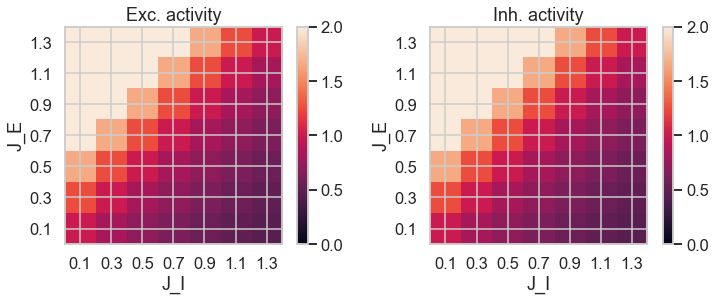

In [ ]:
## CODE HERE (Ex. 1)

tau_E = 10;
tau_I = 10;

I_I = 1; 
I_E = 1;

J_E_range = np.arange(0.1, 1.5, 0.2)
J_I_range = np.arange(0.1, 1.5, 0.2)

r_E_range = np.zeros((len(J_E_range), len(J_I_range)))
r_I_range = np.zeros((len(J_E_range), len(J_I_range)))

for i1, J_E in enumerate(J_E_range):
    for i2, J_I in enumerate(J_I_range):

        w_EE = w_IE = J_E;
        w_EI = w_II = -J_I;

        [r_E, r_I, T] = WC_solver(I_E, I_I, w_EE, w_EI, w_IE, w_II, tau_E, tau_I, dt, T_end);
        r_E_range[i1,i2] = r_E[-1];
        r_I_range[i1,i2] = r_I[-1];

plt.figure(figsize=(12,4))
ax = plt.subplot(121)
plt.title('Exc. activity')
plt.imshow(r_E_range, vmin=0, vmax=2, aspect='equal', origin='lower')
plt.colorbar()
ax.set_yticks(np.arange(len(J_E_range)))
ax.set_yticklabels(np.around(J_E_range,2))
ax.set_xticks(np.arange(len(J_I_range)))
ax.set_xticklabels(np.around(J_I_range,2))
plt.xlabel('J_I')
plt.ylabel('J_E')

ax = plt.subplot(122)
plt.title('Inh. activity')
plt.imshow(r_I_range, vmin=0, vmax=2, aspect='equal', origin='lower')
plt.colorbar()
ax.set_yticks(np.arange(len(J_E_range)))
ax.set_yticklabels(np.around(J_E_range,2))
ax.set_xticks(np.arange(len(J_I_range)))
ax.set_xticklabels(np.around(J_I_range,2))
plt.xlabel('J_I')
plt.ylabel('J_E')

Text(0, 0.5, 'Log. magnitude of the main freq.')

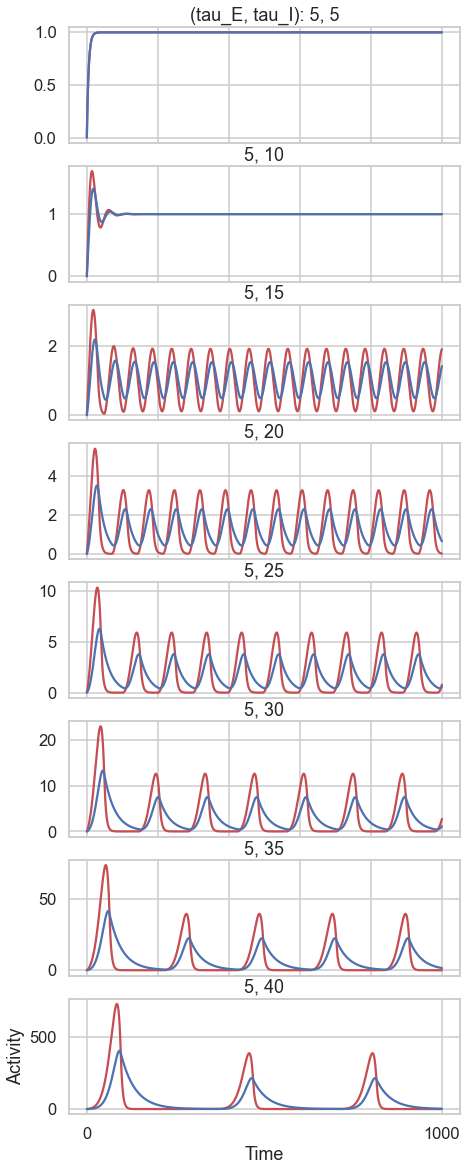

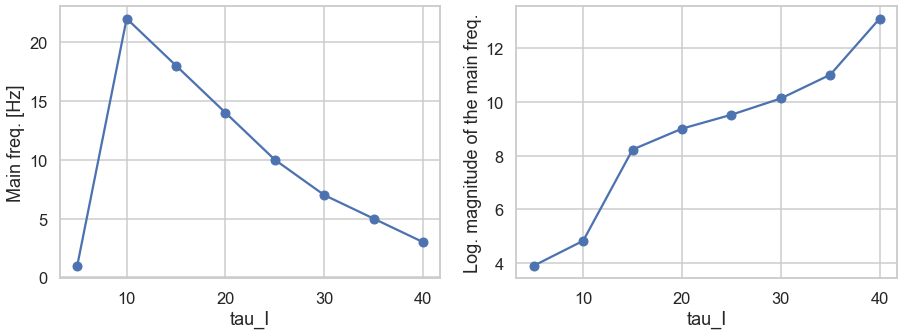

In [ ]:
## CODE HERE (Ex. 2)
I_I = 1; 
I_E = 1;

J_E = 2;
J_I = 2;
w_EE = w_IE = J_E;
w_EI = w_II = -J_I;

tau_E = 5
tau_I_range = np.arange(5, 45, 5)

max_freq_range = np.zeros(len(tau_I_range))
max_mag_range = np.zeros(len(tau_I_range))

plt.figure(figsize=(7,20))
for i1, tau_I in enumerate(tau_I_range):
        
        [r_E, r_I, T] = WC_solver(I_E, I_I, w_EE, w_EI, w_IE, w_II, tau_E, tau_I, dt, T_end);

        [freqs, X, max_freq, max_mag] = FF(r_E, 0)
        max_freq_range[i1] = max_freq
        max_mag_range[i1] = max_mag

        ax = plt.subplot(len(tau_I_range), 1, i1+1)
        if i1 == 0:
            plt.title('(tau_E, tau_I): ' + str(tau_E) + ', ' + str(tau_I))
        else:
            plt.title(str(tau_E) + ', ' + str(tau_I))

        plt.plot(T, r_E, 'r-')
        plt.plot(T, r_I, 'b-')

        if i1 == len(tau_I_range)-1:
            ax.set_xticks([0,T_end])
            ax.set_xticklabels([0, T_end])
            plt.xlabel('Time')
            plt.ylabel('Activity')
        else:
            ax.set_xticklabels([])


plt.figure(figsize=(15,5))
plt.subplot(121)
plt.plot(tau_I_range, max_freq_range, '-o')
plt.xlabel('tau_I')
plt.ylabel('Main freq. [Hz]')
plt.subplot(122)
plt.plot(tau_I_range, np.log(max_mag_range), '-o')
plt.xlabel('tau_I')
plt.ylabel('Log. magnitude of the main freq.')

"\nplt.figure(figsize=(15,5))\nplt.subplot(121)\nplt.plot(J_I_range, max_freq_range, '-o')\nplt.xlabel('J_I')\nplt.ylabel('Main freq. [Hz]')\nplt.subplot(122)\nplt.plot(J_I_range, np.log(max_mag_range), '-o')\nplt.xlabel('J_I')\nplt.ylabel('Log. magnitude of the main freq.')\n"

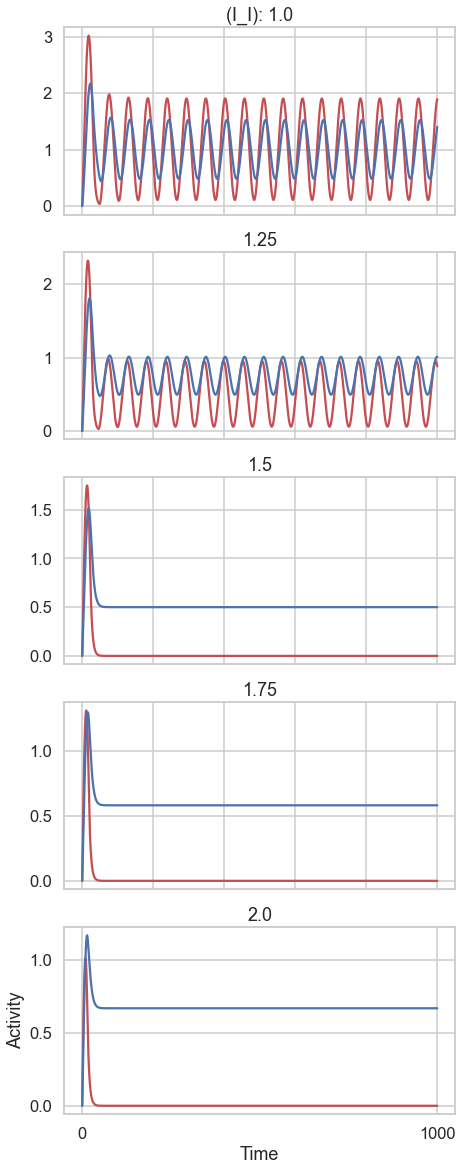

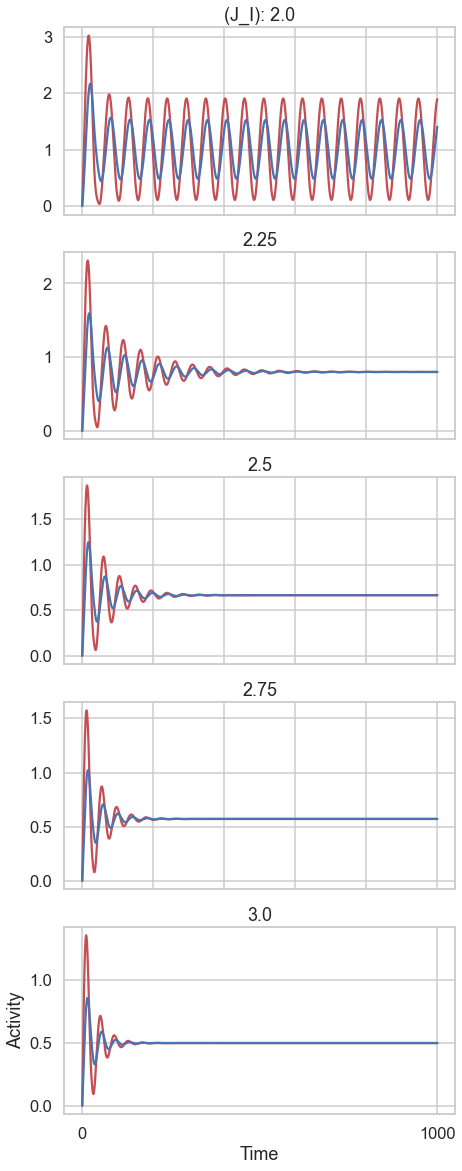

In [ ]:
## CODE HERE (Ex. 3)

### - changing input to Inh
I_I = 1; 
I_E = 1;

J_E = 2;
J_I = 2;
w_EE = w_IE = J_E;
w_EI = w_II = -J_I;

tau_E = 5
tau_I = 15

I_I_range = np.array([1, 1.25, 1.5, 1.75, 2])

max_freq_range = np.zeros(len(I_I_range))
max_mag_range = np.zeros(len(I_I_range))

plt.figure(figsize=(7,20))
for i1, I_I in enumerate(I_I_range):
        [r_E, r_I, T] = WC_solver(I_E, I_I, w_EE, w_EI, w_IE, w_II, tau_E, tau_I, dt, T_end);

        [freqs, X, max_freq, max_mag] = FF(r_E, 0)
        max_freq_range[i1] = max_freq
        max_mag_range[i1] = max_mag

        ax = plt.subplot(len(I_I_range), 1, i1+1)
        if i1 == 0:
            plt.title('(I_I): ' + str(I_I))
        else:
            plt.title(str(I_I))

        plt.plot(T, r_E, 'r-')
        plt.plot(T, r_I, 'b-')

        if i1 == len(I_I_range)-1:
            ax.set_xticks([0,T_end])
            ax.set_xticklabels([0, T_end])
            plt.xlabel('Time')
            plt.ylabel('Activity')
        else:
            ax.set_xticklabels([])

'''
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.plot(I_I_range, max_freq_range, '-o')
plt.xlabel('I_I')
plt.ylabel('Main freq. [Hz]')
plt.subplot(122)
plt.plot(I_I_range, np.log(max_mag_range), '-o')
plt.xlabel('I_I')
plt.ylabel('Log. magnitude of the main freq.')
'''

### - changing I-->E weights
I_I = 1; 
I_E = 1;

J_E = 2;
J_I = 2;

tau_E = 5
tau_I = 15

J_I_range = np.array([2, 2.25, 2.5, 2.75, 3])

max_freq_range = np.zeros(len(J_I_range))
max_mag_range = np.zeros(len(J_I_range))

plt.figure(figsize=(7,20))
for i1, J_I in enumerate(J_I_range):
        
        w_EE = w_IE = J_E;
        w_EI = w_II = -J_I;
        #w_II = -2;

        [r_E, r_I, T] = WC_solver(I_E, I_I, w_EE, w_EI, w_IE, w_II, tau_E, tau_I, dt, T_end);

        [freqs, X, max_freq, max_mag] = FF(r_E, 0)
        max_freq_range[i1] = max_freq
        max_mag_range[i1] = max_mag

        ax = plt.subplot(len(J_I_range), 1, i1+1)
        if i1 == 0:
            plt.title('(J_I): ' + str(J_I))
        else:
            plt.title(str(J_I))

        plt.plot(T, r_E, 'r-')
        plt.plot(T, r_I, 'b-')

        if i1 == len(J_I_range)-1:
            ax.set_xticks([0,T_end])
            ax.set_xticklabels([0, T_end])
            plt.xlabel('Time')
            plt.ylabel('Activity')
        else:
            ax.set_xticklabels([])

'''
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.plot(J_I_range, max_freq_range, '-o')
plt.xlabel('J_I')
plt.ylabel('Main freq. [Hz]')
plt.subplot(122)
plt.plot(J_I_range, np.log(max_mag_range), '-o')
plt.xlabel('J_I')
plt.ylabel('Log. magnitude of the main freq.')
'''
